# Loading data

In [177]:
import pandas as pd

In [178]:
adult_data = pd.read_csv('./data/adult-data.csv')
adult_test = pd.read_csv('./data/adult-test.csv')

In [276]:
adult_data.shape

(32561, 15)

In [184]:
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [253]:
adult_test.shape

(16281, 15)

In [199]:
adult_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


## Combine both files as they have same shape-

In [187]:
adult_dataset = pd.concat((adult_data, adult_test))

In [194]:
adult_dataset.shape

(48842, 15)

In [195]:
adult_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
age                48842 non-null int64
 workclass         48842 non-null object
 fnlwgt            48842 non-null int64
 education         48842 non-null object
 education-num     48842 non-null int64
 marital-status    48842 non-null object
 occupation        48842 non-null object
 relationship      48842 non-null object
 race              48842 non-null object
 sex               48842 non-null object
 capital-gain      48842 non-null int64
 capital-loss      48842 non-null int64
 hours-per-week    48842 non-null int64
 native-country    48842 non-null object
 class             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


## Need to remove additional spaces from column name-

In [197]:
adult_dataset.columns = adult_dataset.columns.str.strip()

In [198]:
adult_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null object
class             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 7.2+ MB


## Verify distribution of class variable -

In [200]:
import matplotlib.pyplot as plt

In [201]:
from collections import Counter

In [202]:
def plot_pie(y):
    target_stats = Counter(y)
    labels = list(target_stats.keys())
    sizes = list(target_stats.values())
    explode = tuple([0.1] * len(target_stats))

    fig, ax = plt.subplots()
    ax.pie(sizes, explode=explode, labels=labels, shadow=True,
           autopct='%1.1f%%')
    ax.axis('equal')

In [203]:
%matplotlib inline

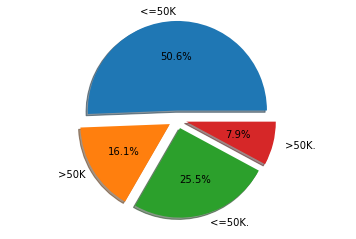

In [204]:
plot_pie(adult_dataset['class'])

In [206]:
adult_dataset['class'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

## Class label has space in begining and few have dot in end, Need to clean this-

In [207]:
def trimVal(x):
    if type(x) is str :
        return x.strip().replace('.','')
    else :
        return x

In [208]:
adult_dataset['class'] = adult_dataset['class'].map(trimVal)

In [209]:
adult_dataset['class'].unique()

array(['<=50K', '>50K'], dtype=object)

## Now we have final dataset for sampling

In [248]:
adult_dataset.shape

(48842, 15)

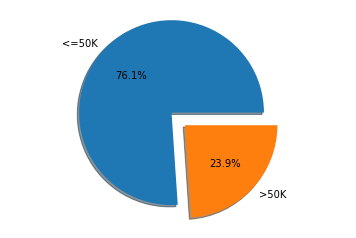

In [210]:
plot_pie(adult_dataset['class'])

In [ ]:
adult_dataset.to_csv('./data/adult_dataset.csv')

### Create function for balance sampling dataset-

In [249]:
def getSample(size, df):
    size1 = int(round(size * 0.75))
    size2 = size - size1
    adult_dataset_less50 = df[(df['class'] == '<=50K')]
    adult_dataset_more50 = df[(df['class'] == '>50K')]
    adult_sample_less50 = adult_dataset_less50.sample(n=size1)
    adult_sample_more50 = adult_dataset_more50.sample(n=size2)
    return pd.concat((adult_sample_less50, adult_sample_more50))

### Create balance sample of size 300 -

In [251]:
adult_sample_300 = getSample(300, adult_dataset)

In [252]:
adult_sample_300.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
26330,35,Self-emp-not-inc,160192,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
7920,49,Private,191389,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
11758,35,Private,176544,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,1741,50,United-States,<=50K
3281,25,Private,175537,Bachelors,13,Never-married,Adm-clerical,Own-child,Black,Female,0,0,40,United-States,<=50K
15657,28,Private,219267,HS-grad,9,Never-married,Other-service,Unmarried,White,Female,0,0,28,United-States,<=50K


In [242]:
adult_sample_300.shape

(300, 15)

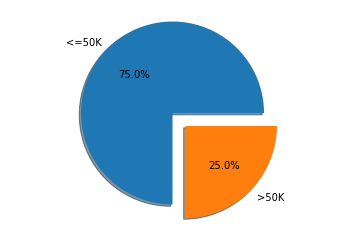

In [243]:
plot_pie(adult_sample_xyz['class'])

In [254]:
adult_sample_300.to_csv('./data/sample/csv/adult_sample_300.csv', index=False)

### Create balanced sample of size 1000 -

In [267]:
adult_sample_1000_balanced = getSample(1000, adult_dataset)

In [268]:
adult_sample_1000_balanced.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
3063,47,Local-gov,115304,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
116,56,Self-emp-inc,303090,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K
12342,22,Private,324445,HS-grad,9,Never-married,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
15615,39,Private,192664,Some-college,10,Divorced,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
11991,29,Private,78261,Prof-school,15,Never-married,Prof-specialty,Own-child,White,Male,0,0,50,United-States,<=50K


In [269]:
adult_sample_1000_balanced.shape

(1000, 15)

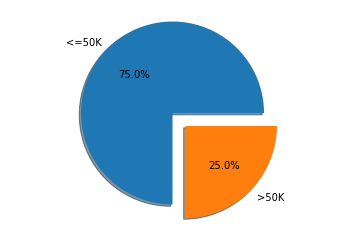

In [270]:
plot_pie(adult_sample_1000_balanced['class'])

In [271]:
adult_sample_1000_balanced.to_csv('./data/sample/csv/adult_sample_1000_balanced.csv', index=False)

### Create unbalanced sample of size 1000

In [272]:
adult_sample_1000_unbalanced = adult_dataset.sample(n=1000)

In [273]:
adult_sample_1000_unbalanced.shape

(1000, 15)

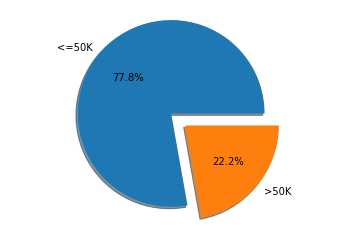

In [274]:
plot_pie(adult_sample_1000_unbalanced['class'])

In [275]:
adult_sample_1000_unbalanced.to_csv('./data/sample/csv/adult_sample_1000_unbalanced.csv', index=False)